In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_excel('http://taanila.fi/wine.xlsx')
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


C:\Users\jukka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jukka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\jukka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\jukka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


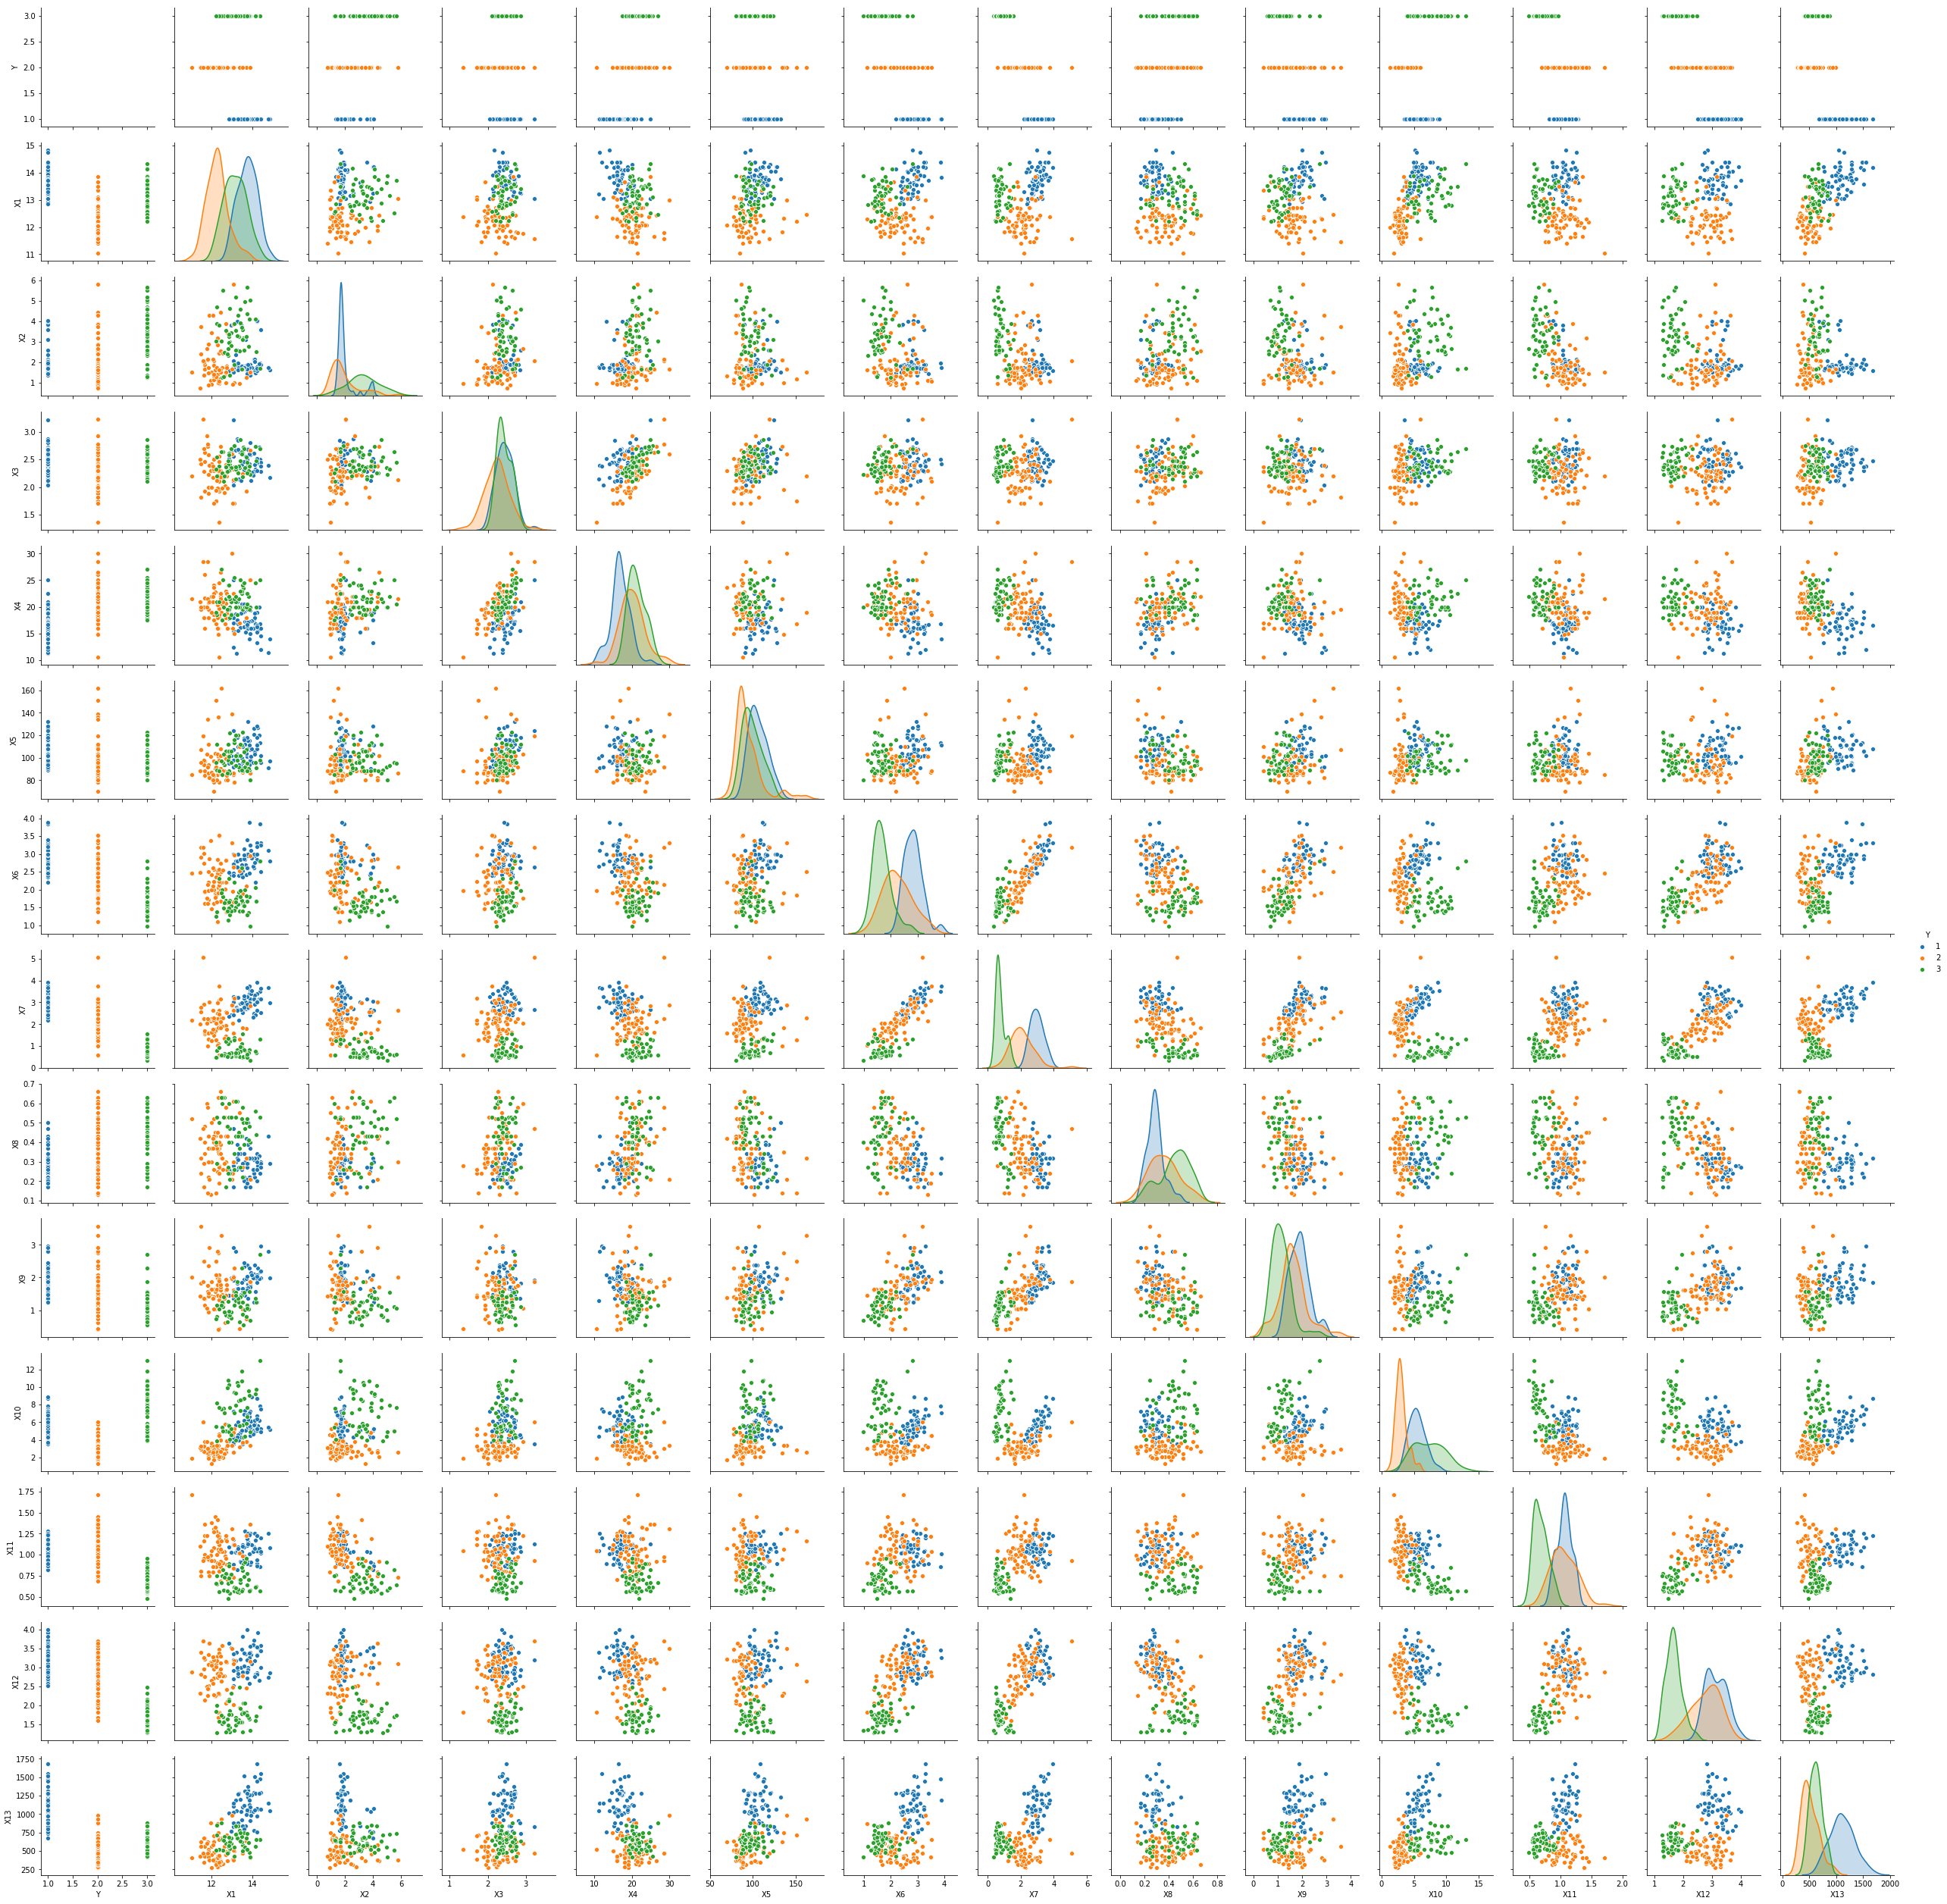

In [2]:
sns.pairplot(df, hue='Y')

In [3]:
X = df.drop('Y', axis=1)
y = df['Y']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

KNeigbors mallilla päästiin opetusdatassa 0,83 ja testiadatassa 0,68 osuvuuteen.

from sklearn.neighbors import KNeighborsClassifier
malli = KNeighborsClassifier(n_neighbors=5)
malli.fit(X_train, y_train)
y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)
from sklearn.metrics import accuracy_score

#Opetusdatan osuvuus
accuracy_score(y_train, y_train_malli)

#Testidataan osuvuus
accuracy_score(y_test, y_test_malli)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_malli))

print(confusion_matrix(y_test, y_test_malli))

Muutetaan markdowniksi ylemmät pätkät, jotta voidaaan jatkaa tästä suoraan päätöspuumalilla

In [5]:
from sklearn import tree
malli = tree.DecisionTreeClassifier(max_depth=4)
malli.fit(X_train, y_train)

y_train_malli = malli.predict(X_train)
y_test_malli = malli.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_malli))

1.0


In [7]:
print(accuracy_score(y_test, y_test_malli))

0.9111111111111111


In [8]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_malli))

[[40  0  0]
 [ 0 57  0]
 [ 0  0 36]]


In [9]:
print(confusion_matrix(y_test, y_test_malli))

[[17  2  0]
 [ 1 12  1]
 [ 0  0 12]]


Nyt päästiin jo kohtalaisiin tuloksiin.

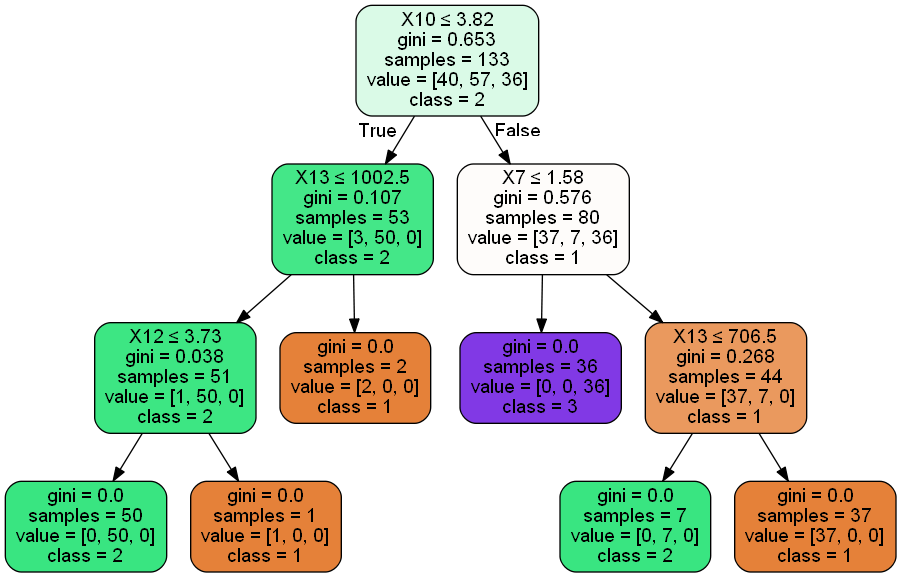

In [10]:
import pydotplus 
from IPython.display import Image  

dot_data = tree.export_graphviz(malli, out_file=None, 
                         feature_names=X.columns,
                         class_names=['1', '2', '3'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [11]:
graph.write_pdf("päätöspuu.pdf")

True